In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
df_train_ex = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e2/sample_submission.csv')

In [3]:
df_train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
df_train.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [5]:
df_train_ex.shape,df_train.shape

((3694318, 11), (300000, 11))

In [6]:
df_train = pd.concat([df_train_ex, df_train], axis=0).reset_index(drop=True)
df_train.shape

(3994318, 11)

In [7]:
df_train = df_train[:1994318]

In [8]:
df_test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [9]:
df_sub.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


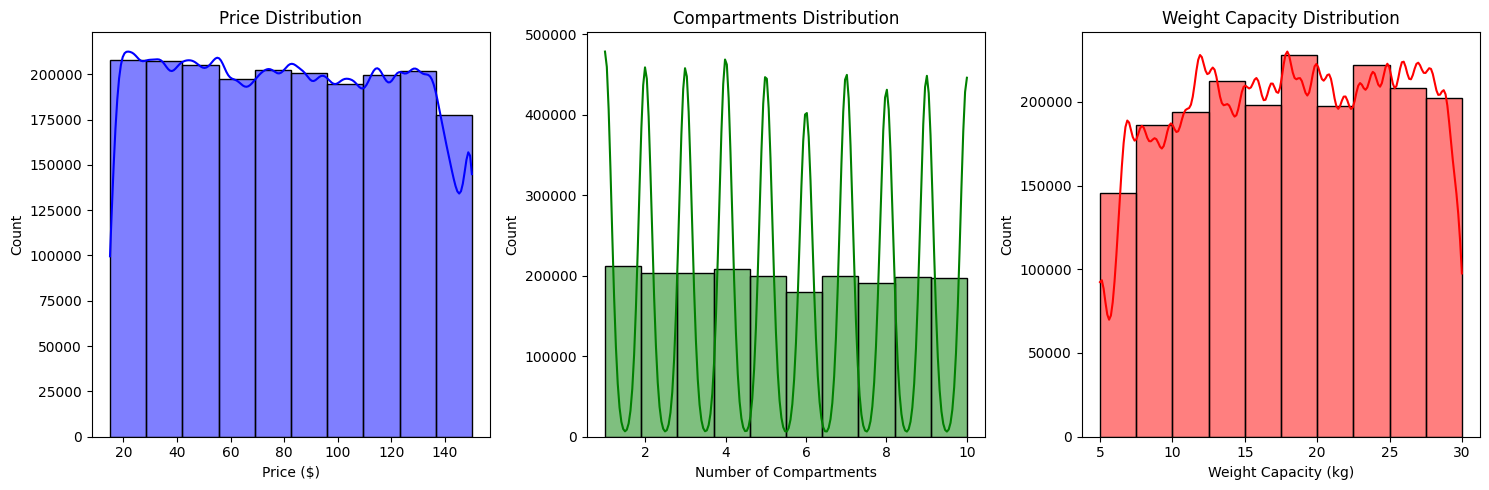

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["Price"], bins=10, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price ($)")

plt.subplot(1, 3, 2)
sns.histplot(df_train["Compartments"], bins=10, kde=True, color='green')
plt.title("Compartments Distribution")
plt.xlabel("Number of Compartments")

plt.subplot(1, 3, 3)
sns.histplot(df_train["Weight Capacity (kg)"], bins=10, kde=True, color='red')
plt.title("Weight Capacity Distribution")
plt.xlabel("Weight Capacity (kg)")

plt.tight_layout()
plt.show()

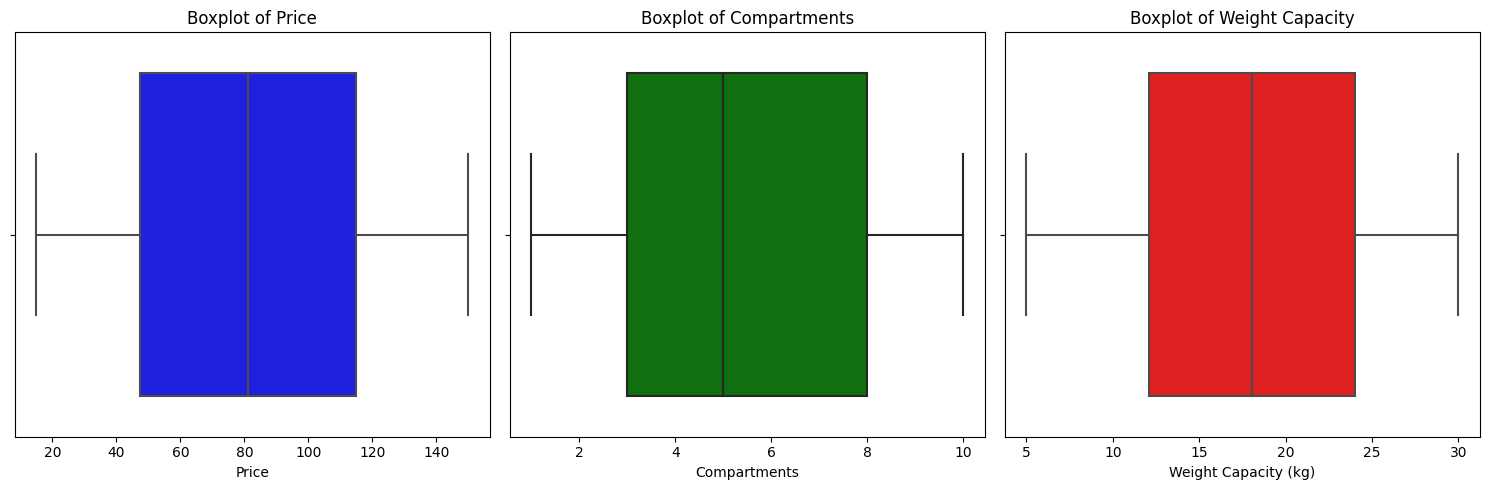

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_train["Price"], color='blue')
plt.title("Boxplot of Price")

plt.subplot(1, 3, 2)
sns.boxplot(x=df_train["Compartments"], color='green')
plt.title("Boxplot of Compartments")

plt.subplot(1, 3, 3)
sns.boxplot(x=df_train["Weight Capacity (kg)"], color='red')
plt.title("Boxplot of Weight Capacity")

plt.tight_layout()
plt.show()

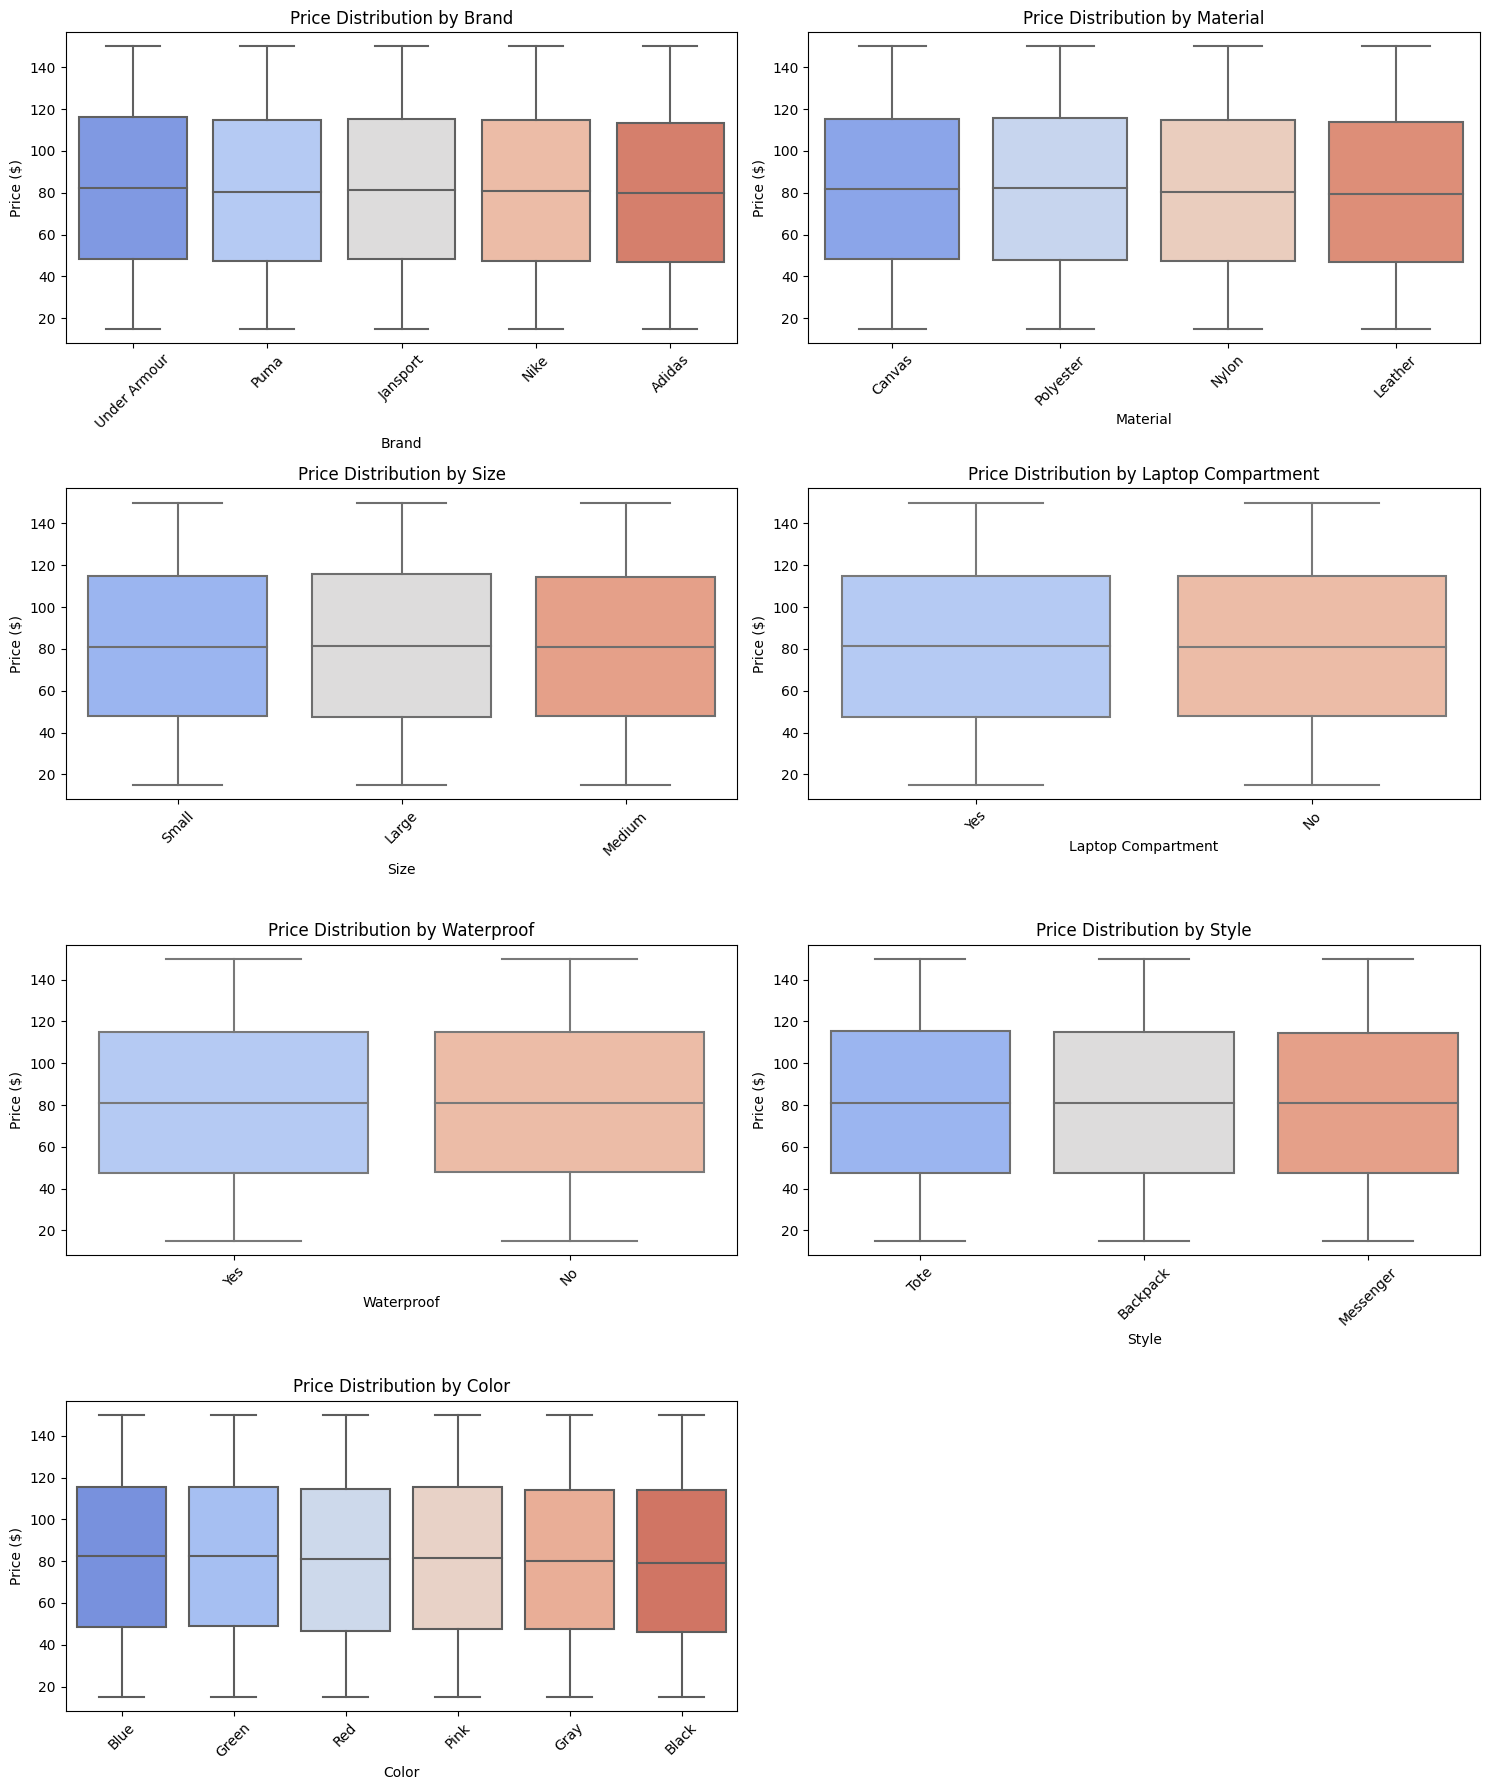

In [12]:
categorical_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
plt.figure(figsize=(15, 18))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_train[col], y=df_train["Price"], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.ylabel("Price ($)")
    plt.title(f"Price Distribution by {col}")

plt.tight_layout()

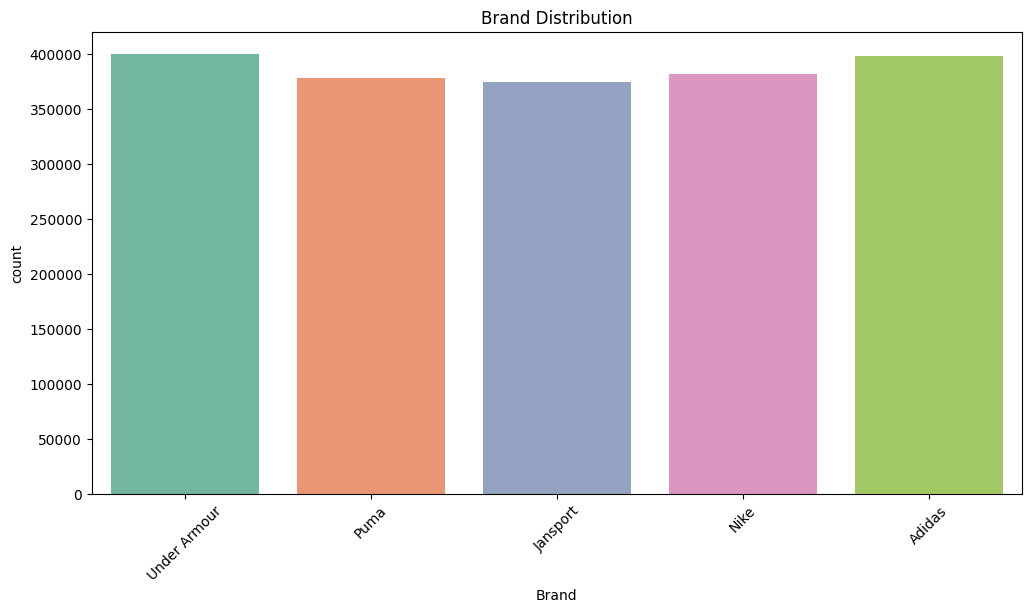

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', data=df_train, palette='Set2')
plt.title('Brand Distribution')
plt.xticks(rotation=45)
plt.show()

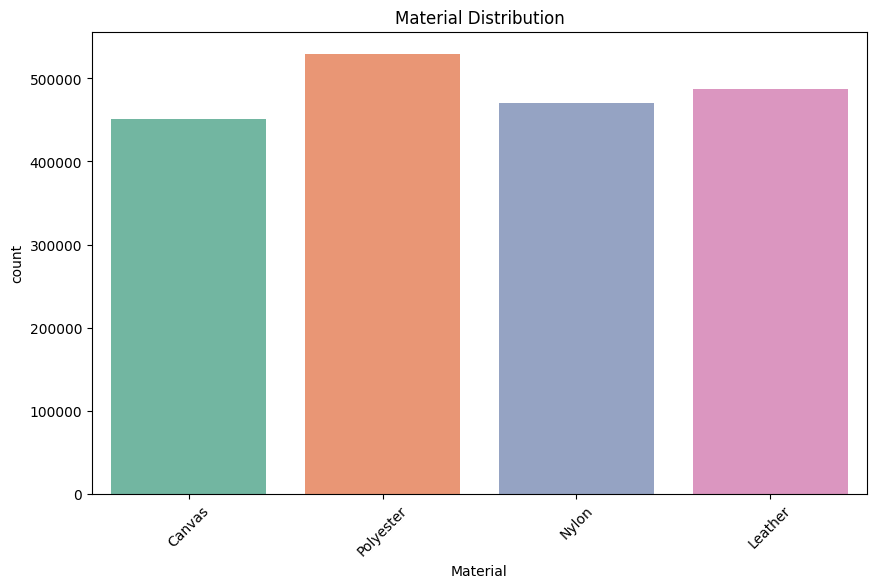

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Material', data=df_train, palette='Set2')
plt.title('Material Distribution')
plt.xticks(rotation=45)
plt.show()

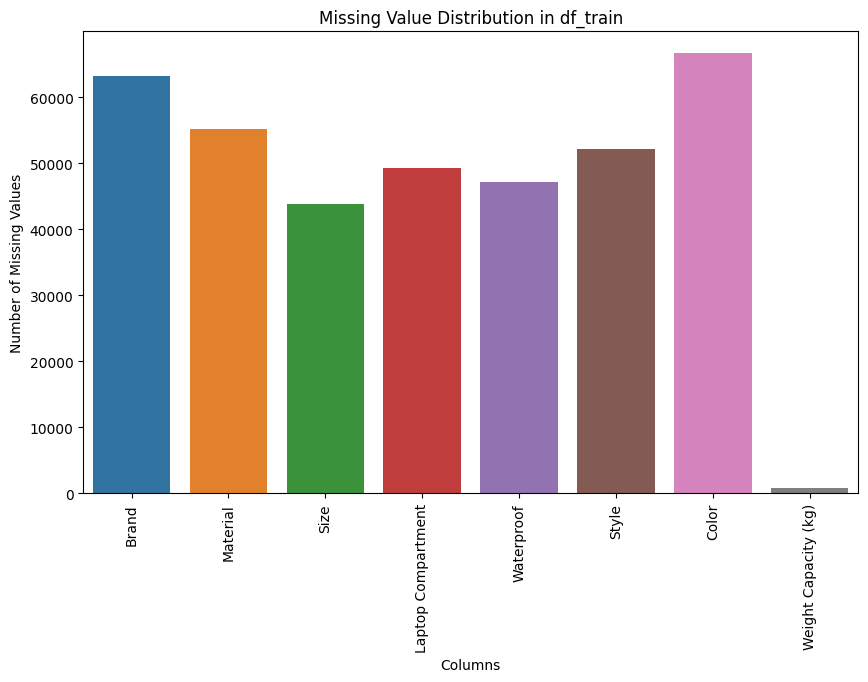

In [16]:
missing_data = df_train.isnull().sum()
missing_data = missing_data[missing_data > 0] 

if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y=missing_data.values)
    plt.title('Missing Value Distribution in df_train')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No missing values in the dataset.")

In [17]:
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [18]:
df_test.isnull().sum()

Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [19]:
df_train.isnull().sum()

Brand                   63162
Material                55283
Size                    43898
Compartments                0
Laptop Compartment      49315
Waterproof              47224
Style                   52179
Color                   66648
Weight Capacity (kg)      860
Price                       0
dtype: int64

In [20]:
df_train.shape,df_test.shape

((1994318, 10), (200000, 9))

In [21]:
df_train = df_train[:994318]

## Feature Engineering

In [22]:
def feature_engineering(df):
    size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
    df['Size_Num'] = df['Size'].map(size_mapping)
    df['Compartments_per_Size'] = df['Compartments'] / df['Size_Num']    
    df['Weight_per_Compartment'] = df['Weight Capacity (kg)'] / df['Compartments'] 
    df['Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})
    df['Laptop Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Waterproof_Laptop'] = df['Waterproof'] * df['Laptop Compartment']
    df['Is_Durable_Material'] = df['Material'].apply(lambda x: 1 if x in ['Leather', 'Nylon'] else 0)
    df['Is_Lightweight_Material'] = df['Material'].apply(lambda x: 1 if x in ['Canvas', 'Nylon'] else 0)
    df['Luxury_Material'] = df['Material'].apply(lambda x: 1 if x == 'Leather' else 0)
    df['Professional_Style'] = df['Style'].apply(lambda x: 1 if x in ['Messenger', 'Tote'] else 0)
    df['Casual_Style'] = df['Style'].apply(lambda x: 1 if x in ['Backpack', 'Duffle'] else 0)
    df['Is_Premium_Brand'] = df['Brand'].apply(lambda x: 1 if x in ['Nike', 'Under Armour', 'Adidas'] else 0)
    df['Is_Budget_Brand'] = df['Brand'].apply(lambda x: 1 if x == 'Jansport' else 0)
    df['Is_Small'] = df['Size'].apply(lambda x: 1 if x == 'Small' else 0)
    df['Is_Medium'] = df['Size'].apply(lambda x: 1 if x == 'Medium' else 0)
    df['Is_Large'] = df['Size'].apply(lambda x: 1 if x == 'Large' else 0)

    return df

df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [23]:
df_train.dtypes

Brand                       object
Material                    object
Size                        object
Compartments               float64
Laptop Compartment         float64
Waterproof                 float64
Style                       object
Color                       object
Weight Capacity (kg)       float64
Price                      float64
Size_Num                   float64
Compartments_per_Size      float64
Weight_per_Compartment     float64
Waterproof_Laptop          float64
Is_Durable_Material          int64
Is_Lightweight_Material      int64
Luxury_Material              int64
Professional_Style           int64
Casual_Style                 int64
Is_Premium_Brand             int64
Is_Budget_Brand              int64
Is_Small                     int64
Is_Medium                    int64
Is_Large                     int64
dtype: object

In [24]:
df_train.columns,df_test.columns

(Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
        'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price',
        'Size_Num', 'Compartments_per_Size', 'Weight_per_Compartment',
        'Waterproof_Laptop', 'Is_Durable_Material', 'Is_Lightweight_Material',
        'Luxury_Material', 'Professional_Style', 'Casual_Style',
        'Is_Premium_Brand', 'Is_Budget_Brand', 'Is_Small', 'Is_Medium',
        'Is_Large'],
       dtype='object'),
 Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
        'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Size_Num',
        'Compartments_per_Size', 'Weight_per_Compartment', 'Waterproof_Laptop',
        'Is_Durable_Material', 'Is_Lightweight_Material', 'Luxury_Material',
        'Professional_Style', 'Casual_Style', 'Is_Premium_Brand',
        'Is_Budget_Brand', 'Is_Small', 'Is_Medium', 'Is_Large'],
       dtype='object'))

In [25]:
df_train.isnull().sum()

Brand                      31612
Material                   27663
Size                       21795
Compartments                   0
Laptop Compartment         24737
Waterproof                 23633
Style                      26026
Color                      33167
Weight Capacity (kg)         448
Price                          0
Size_Num                   21795
Compartments_per_Size      21795
Weight_per_Compartment       448
Waterproof_Laptop          48070
Is_Durable_Material            0
Is_Lightweight_Material        0
Luxury_Material                0
Professional_Style             0
Casual_Style                   0
Is_Premium_Brand               0
Is_Budget_Brand                0
Is_Small                       0
Is_Medium                      0
Is_Large                       0
dtype: int64

In [26]:
cat = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color']

df_train[cat] = df_train[cat].fillna('None').astype('string').astype('category')
median_weight = df_train['Weight Capacity (kg)'].median()
df_train['Weight Capacity (kg) categorical'] = df_train['Weight Capacity (kg)'].fillna(median_weight).astype('string')
df_train['Weight Capacity (kg)'] = df_train['Weight Capacity (kg)'].fillna(median_weight).astype('float64')

df_test[cat] = df_test[cat].fillna('None').astype('string').astype('category')
df_test['Weight Capacity (kg) categorical'] = df_test['Weight Capacity (kg)'].fillna(median_weight).astype('string')
df_test['Weight Capacity (kg)'] = df_test['Weight Capacity (kg)'].fillna(median_weight)

In [27]:
df_train.dtypes

Brand                                     category
Material                                  category
Size                                      category
Compartments                              category
Laptop Compartment                        category
Waterproof                                category
Style                                     category
Color                                     category
Weight Capacity (kg)                       float64
Price                                      float64
Size_Num                                   float64
Compartments_per_Size                      float64
Weight_per_Compartment                     float64
Waterproof_Laptop                          float64
Is_Durable_Material                          int64
Is_Lightweight_Material                      int64
Luxury_Material                              int64
Professional_Style                           int64
Casual_Style                                 int64
Is_Premium_Brand               

In [28]:
y = df_train['Price'] 
df_train = df_train.drop(['Price'],axis=1)
X = df_train
X_test = df_test

In [29]:
df_train.isnull().sum()

Brand                                   0
Material                                0
Size                                    0
Compartments                            0
Laptop Compartment                      0
Waterproof                              0
Style                                   0
Color                                   0
Weight Capacity (kg)                    0
Size_Num                            21795
Compartments_per_Size               21795
Weight_per_Compartment                448
Waterproof_Laptop                   48070
Is_Durable_Material                     0
Is_Lightweight_Material                 0
Luxury_Material                         0
Professional_Style                      0
Casual_Style                            0
Is_Premium_Brand                        0
Is_Budget_Brand                         0
Is_Small                                0
Is_Medium                               0
Is_Large                                0
Weight Capacity (kg) categorical  

In [30]:
print("Variance:", y.var())
print("Standard Deviation:",y.std())

Variance: 1515.7628688119535
Standard Deviation: 38.93279939603565


In [31]:
from scipy.stats import skew
print("Skewness:", skew(y))

Skewness: 0.03696786699293529


## Feature Scalling

In [32]:
scaled_train_data = X
scaled_test_data = X_test

In [33]:
X.columns

Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Size_Num',
       'Compartments_per_Size', 'Weight_per_Compartment', 'Waterproof_Laptop',
       'Is_Durable_Material', 'Is_Lightweight_Material', 'Luxury_Material',
       'Professional_Style', 'Casual_Style', 'Is_Premium_Brand',
       'Is_Budget_Brand', 'Is_Small', 'Is_Medium', 'Is_Large',
       'Weight Capacity (kg) categorical'],
      dtype='object')

In [34]:
X.shape,X_test.shape

((994318, 24), (200000, 24))

## Defining Model

In [35]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
import gc

catboost_params = {'learning_rate': 0.058385610787340024, 
                   'l2_leaf_reg': 7.322579713051955, 'depth': 4,
    'task_type': 'GPU',  
    'iterations':2000, 'loss_function':'RMSE', 'eval_metric':'RMSE', 'random_seed':42
}

cat_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color', 'Weight Capacity (kg) categorical']
#cat_cols = ['Brand', 'Material', 'Size', 'Style', 'Color']

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
catboost_predictions = np.zeros(len(df_train))
catboost_true_labels = np.zeros(len(df_train))
catboost_test_predictions = np.zeros(len(df_test))

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")

    X_train, X_val = df_train.iloc[train_idx], df_train.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostRegressor(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),cat_features=cat_cols,
                       verbose=False)
    catboost_fold_preds = catboost_model.predict(X_val)
    catboost_fold_test_preds = catboost_model.predict(df_test)
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val
    catboost_test_predictions += catboost_fold_test_preds / n_splits  
    fold_rmse = np.sqrt(mean_squared_error(y_val, catboost_fold_preds))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")
overall_rmse_catboost = np.sqrt(mean_squared_error(catboost_true_labels, catboost_predictions))
print(f"Overall RMSE (CatBoostRegressor): {overall_rmse_catboost:.4f}")

Training fold 1/5...
Fold 1 RMSE: 38.8555
Training fold 2/5...
Fold 2 RMSE: 38.7145
Training fold 3/5...
Fold 3 RMSE: 38.7908
Training fold 4/5...
Fold 4 RMSE: 38.8139
Training fold 5/5...
Fold 5 RMSE: 38.7951
Overall RMSE (CatBoostRegressor): 38.7940


In [36]:
from catboost import  Pool

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

catboost_params = {
    'learning_rate': 0.062,
    'l2_leaf_reg': 7,
    'depth': 6,
    'task_type': 'GPU',  
    'iterations': 3000,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'random_seed': 42
}

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

scores = []
test_preds = []
X_test_pool = Pool(df_test, cat_features=cat_cols)

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    X_train, X_val = df_train.iloc[train_idx], df_train.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_pool = Pool(X_train, y_train, cat_features=cat_cols)
    X_valid_pool = Pool(X_val, y_val, cat_features=cat_cols)
    
    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train_pool, eval_set=X_valid_pool, early_stopping_rounds=200, verbose=100)
    
    val_pred = model.predict(X_valid_pool)
    score = rmse(y_val, val_pred)
    scores.append(score)
    
    test_pred = model.predict(X_test_pool)
    test_preds.append(test_pred)
    
    print(f"Fold {fold + 1} RMSE: {score:.4f}")

print(f'Optimized Cross-validated RMSE score: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
print(f'Max RMSE score: {np.max(scores):.3f}')
print(f'Min RMSE score: {np.min(scores):.3f}')

Training fold 1/10...
0:	learn: 38.9184333	test: 39.0043702	best: 39.0043702 (0)	total: 79.4ms	remaining: 3m 58s
100:	learn: 38.8207714	test: 38.8791841	best: 38.8791841 (100)	total: 7.16s	remaining: 3m 25s
200:	learn: 38.8063569	test: 38.8710774	best: 38.8710774 (200)	total: 14.9s	remaining: 3m 27s
300:	learn: 38.7918208	test: 38.8636356	best: 38.8636356 (300)	total: 23.1s	remaining: 3m 26s
400:	learn: 38.7791899	test: 38.8591967	best: 38.8591967 (399)	total: 31.3s	remaining: 3m 22s
500:	learn: 38.7676341	test: 38.8559377	best: 38.8559377 (500)	total: 39.6s	remaining: 3m 17s
600:	learn: 38.7565270	test: 38.8540533	best: 38.8540533 (600)	total: 48.1s	remaining: 3m 11s
700:	learn: 38.7465020	test: 38.8530759	best: 38.8530656 (698)	total: 56.2s	remaining: 3m 4s
800:	learn: 38.7358762	test: 38.8517796	best: 38.8517071 (796)	total: 1m 4s	remaining: 2m 57s
900:	learn: 38.7261229	test: 38.8511418	best: 38.8511418 (900)	total: 1m 12s	remaining: 2m 49s
1000:	learn: 38.7156283	test: 38.8504231	

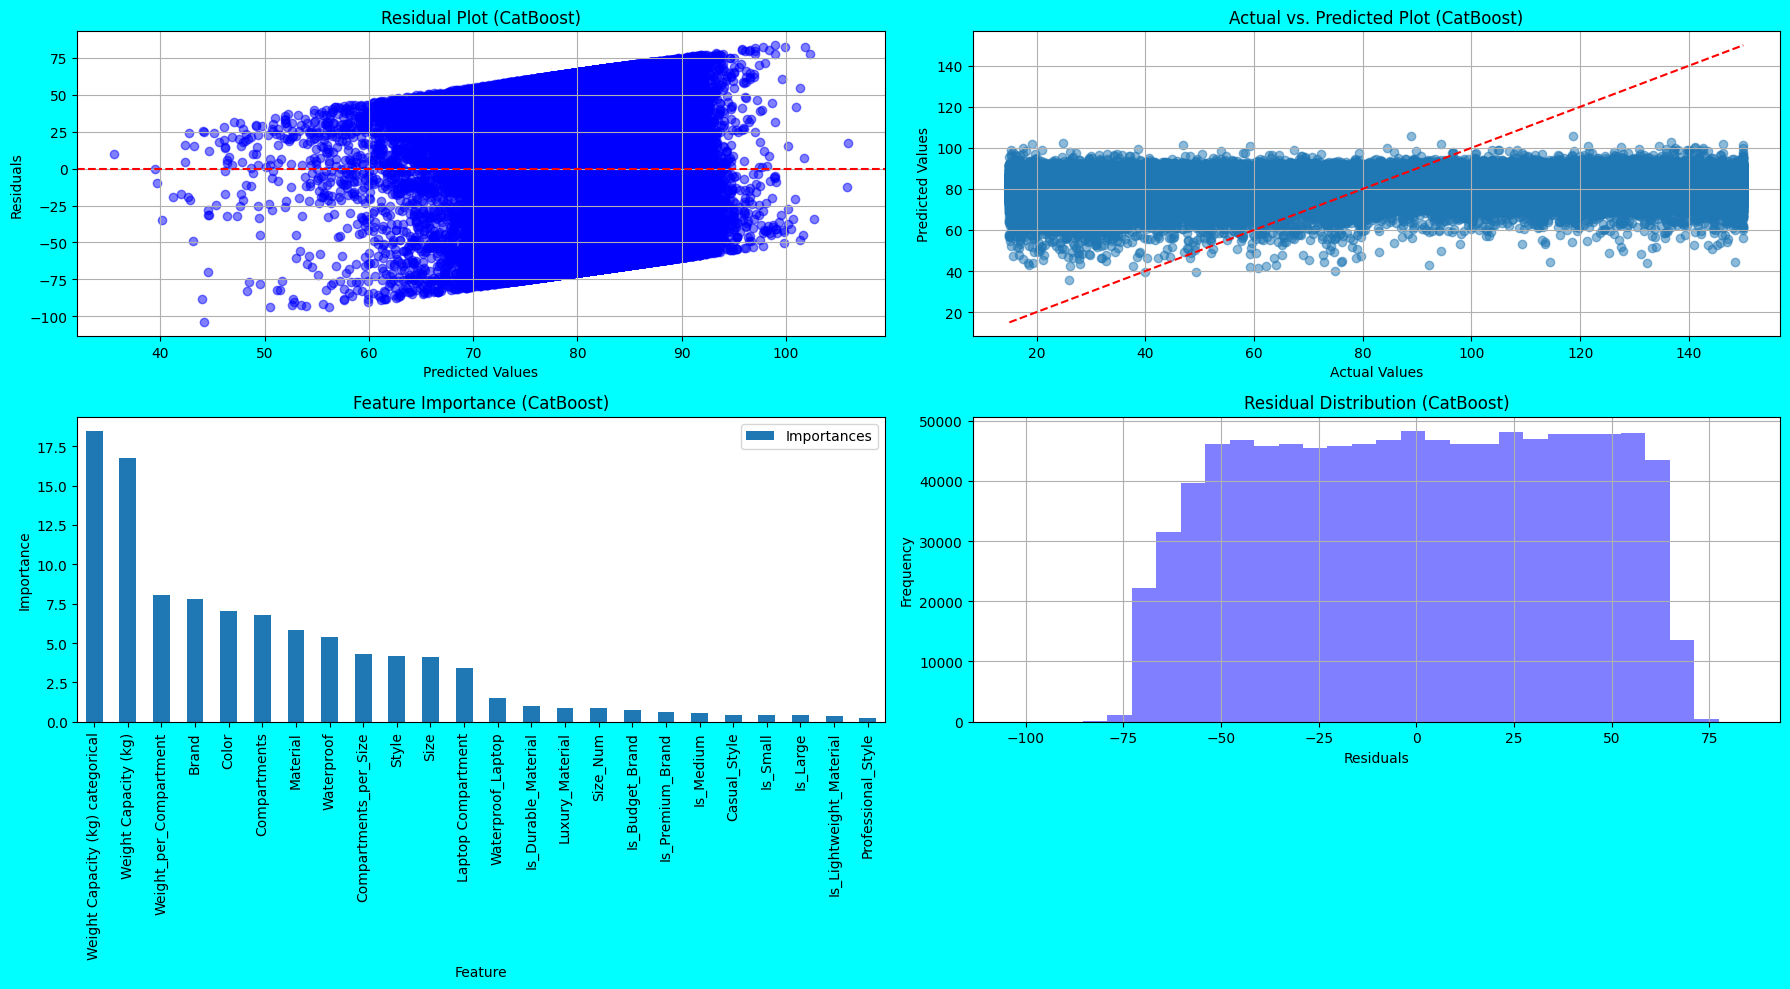

In [38]:
catboost_residuals = np.array(catboost_predictions) - np.array(catboost_true_labels)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes[0, 0].scatter(catboost_predictions, catboost_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (CatBoost)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)

axes[0, 1].scatter(catboost_true_labels, catboost_predictions, alpha=0.5)
axes[0, 1].plot([min(catboost_true_labels), max(catboost_true_labels)], [min(catboost_true_labels), max(catboost_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (CatBoost)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)

importances = model.get_feature_importance(prettified=True)
importances.plot(kind='bar', x='Feature Id', y='Importances', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance (CatBoost)')
axes[1, 0].set_xlabel('Feature')
axes[1, 0].set_ylabel('Importance')

axes[1, 1].hist(catboost_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (CatBoost)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

plt.gcf().set_facecolor('cyan')
plt.tight_layout()
plt.show()

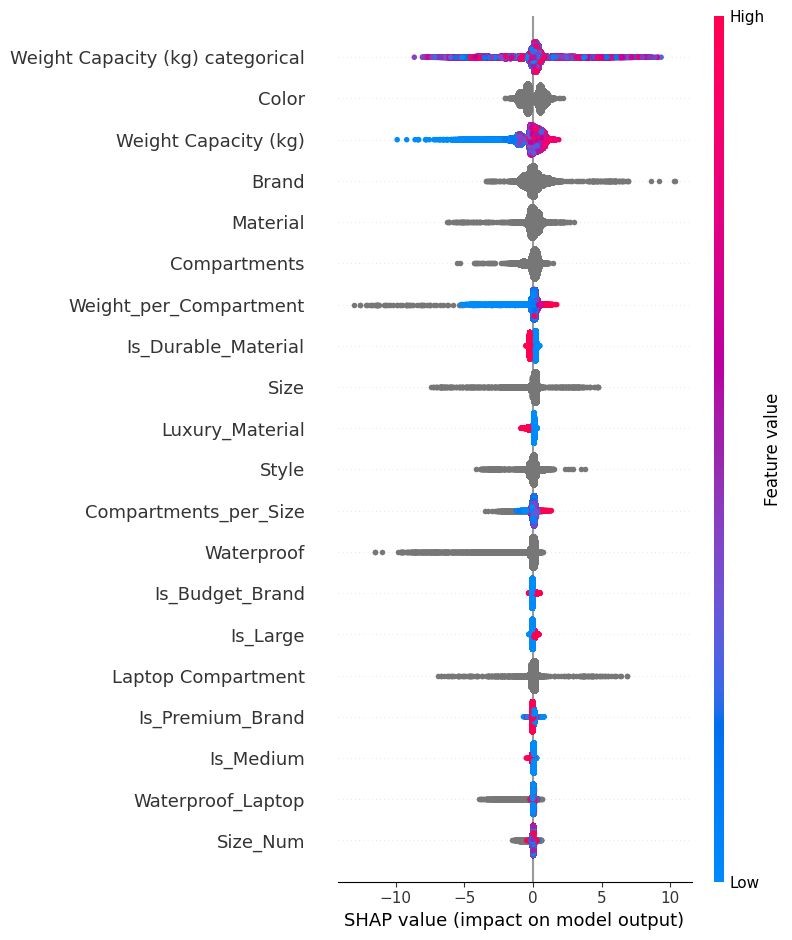

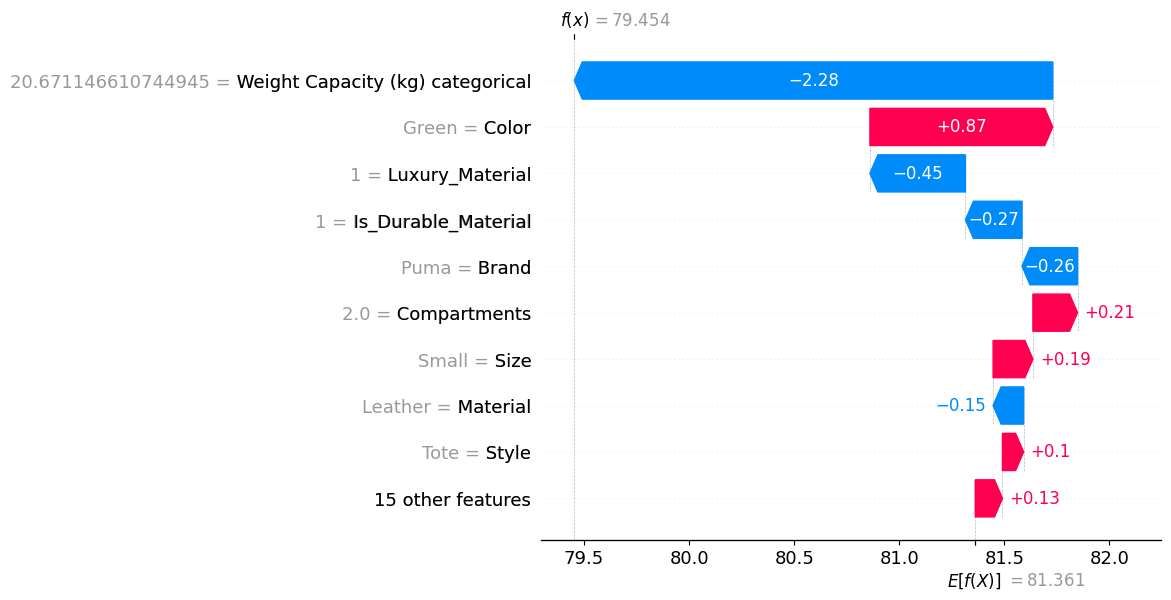

In [39]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
shap.waterfall_plot(shap_values[0]) 

In [40]:
test_preds_flattened = np.mean(test_preds, axis=0)
test_preds_flattened

array([79.97940328, 81.25501546, 85.36837025, ..., 82.96636366,
       82.70166854, 81.16291547])

In [41]:
catboost_test_predictions.shape

(200000,)

In [42]:
df_test['Price'] = test_preds_flattened

In [43]:
df_sub.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


In [44]:
df_sub['Price'] = df_test['Price']
df_sub.to_csv('submission.csv', index=False)

<Axes: >

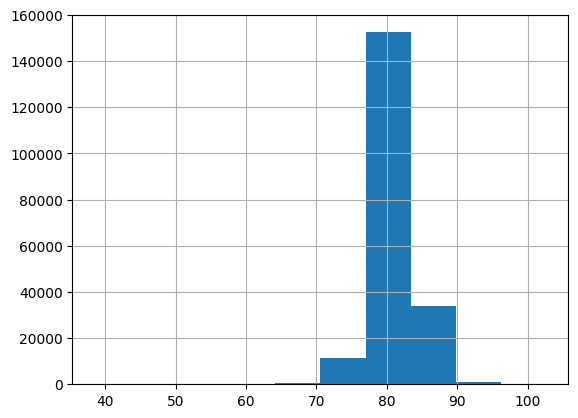

In [45]:
df_sub['Price'].hist()